## 221501138 - Sivabalan
Implemented program to apply moving average smoothing for data preparation and time series forecasting

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
np.random.seed(42)
date_rng = pd.date_range(start='2025-01-01', end='2025-02-01', freq='D')
temperature = np.random.randint(20, 40, size=len(date_rng)) + np.random.normal(0, 2, len(date_rng))

In [5]:
df = pd.DataFrame({'Date': date_rng, 'Temperature': temperature})
df.set_index('Date', inplace=True)

In [6]:
df['SMA_3'] = df['Temperature'].rolling(window=3).mean()
df['SMA_5'] = df['Temperature'].rolling(window=5).mean()

In [7]:
df

,Temperature,SMA_3,SMA_5
Date,,,
2025-01-01,24.798723,NaN,NaN
2025-01-02,38.416613,NaN,NaN
2025-01-03,32.796587,32.003974,NaN
2025-01-04,33.704556,34.972585,NaN
2025-01-05,26.973006,31.158050,31.337897
2025-01-06,23.884578,28.187380,31.155068
2025-01-07,39.645090,30.167558,31.400763
2025-01-08,27.558313,30.362660,30.353109
2025-01-09,30.417727,32.540377,29.695743


In [8]:
df.dropna(inplace=True)

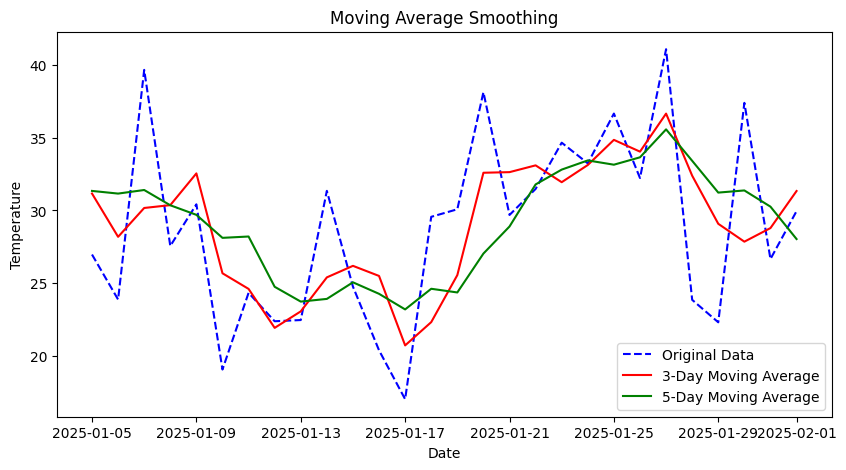

In [9]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Temperature'], label='Original Data', color='blue', linestyle='dashed')
plt.plot(df.index, df['SMA_3'], label='3-Day Moving Average', color='red')
plt.plot(df.index, df['SMA_5'], label='5-Day Moving Average', color='green')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Moving Average Smoothing')
plt.legend()
plt.show()

In [11]:
df.tail()

,Temperature,SMA_3,SMA_5
Date,,,
2025-01-28,23.862560,32.382637,33.404781
2025-01-29,22.321565,29.082041,31.223127
2025-01-30,37.381575,27.855233,31.370210
2025-01-31,26.662527,28.788556,30.258045
2025-02-01,29.951090,31.331731,28.035864


In [14]:
next_day_forecast = df['SMA_5'].iloc[-1]
print(f"Predicted temperature for the next day: {next_day_forecast:.2f}°C")

Predicted temperature for the next day: 28.04°C
